In [17]:
import numpy as np
import scipy.stats as ss
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ml.style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# Create dataset and plot

#### NOTE : All datasets in this notebook will be linearly separable(or almost)

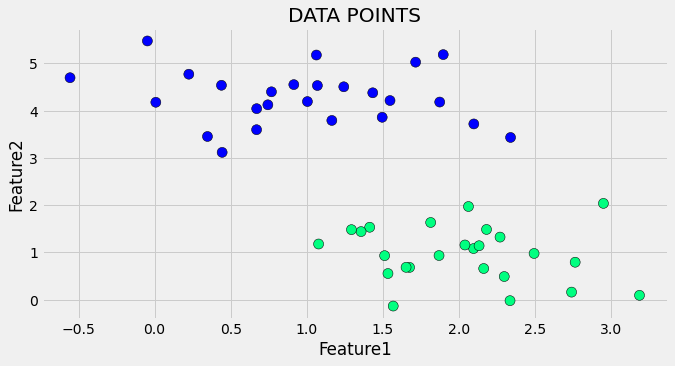

In [33]:
X,Y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100,edgecolors='black')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("DATA POINTS")
plt.show()

#### The data is clearly linearly separable

# TRAINING THE MODEL AND DEFINING THE PLOTTING FUNCTION

In [37]:
svm = SVC(kernel='linear',C=1)
svm.fit(X,Y)
# Plotting function
def plot_svm(model=svm,ax=None,plot_support=True):
  if ax is None:
    ax = plt.gca()    # Get Current Axes
  # Set limits for x and y data. Here, it will return [X.min(),X.max()] and [Y.min(),Y.max()]
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  # Creating mesh grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  YY,XX = np.meshgrid(y,x)
  test_data = np.vstack([XX.ravel(),YY.ravel()]).T
  z = model.decision_function(test_data).reshape(XX.shape)    # svm.SVC.decision_function() : Returns scores of prediction. If > 1, lies above boundary hyperplane, else, below. That's how classification is made.

  # Plotting
  ax.contour(XX,YY,z,levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'],colors=['black','red','black'])
  # ax.contourf(XX,YY,z)
  # Plotting the support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=500,linewidth=1,facecolors='None')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

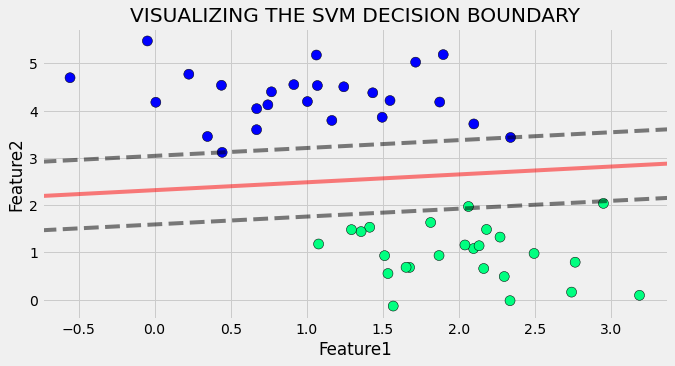

In [39]:
# Test run
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100,edgecolors='black')
plot_svm(svm)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("VISUALIZING THE SVM DECISION BOUNDARY")
plt.show()

## TRYING THIS FOR DIFFERENT NUMBER OF DATA POINTS AND 9 DIFFERENT VALUES OF C.

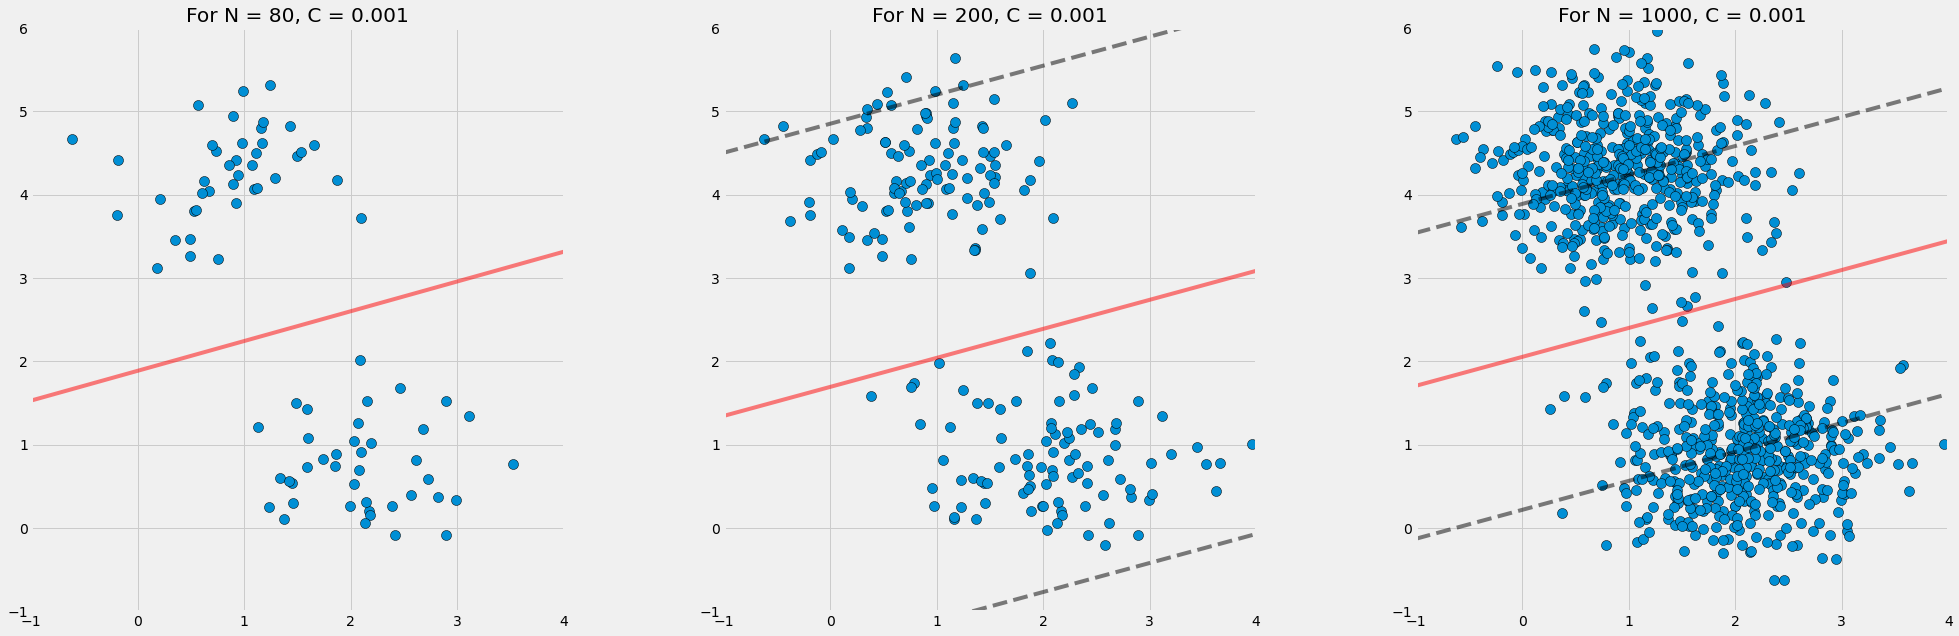

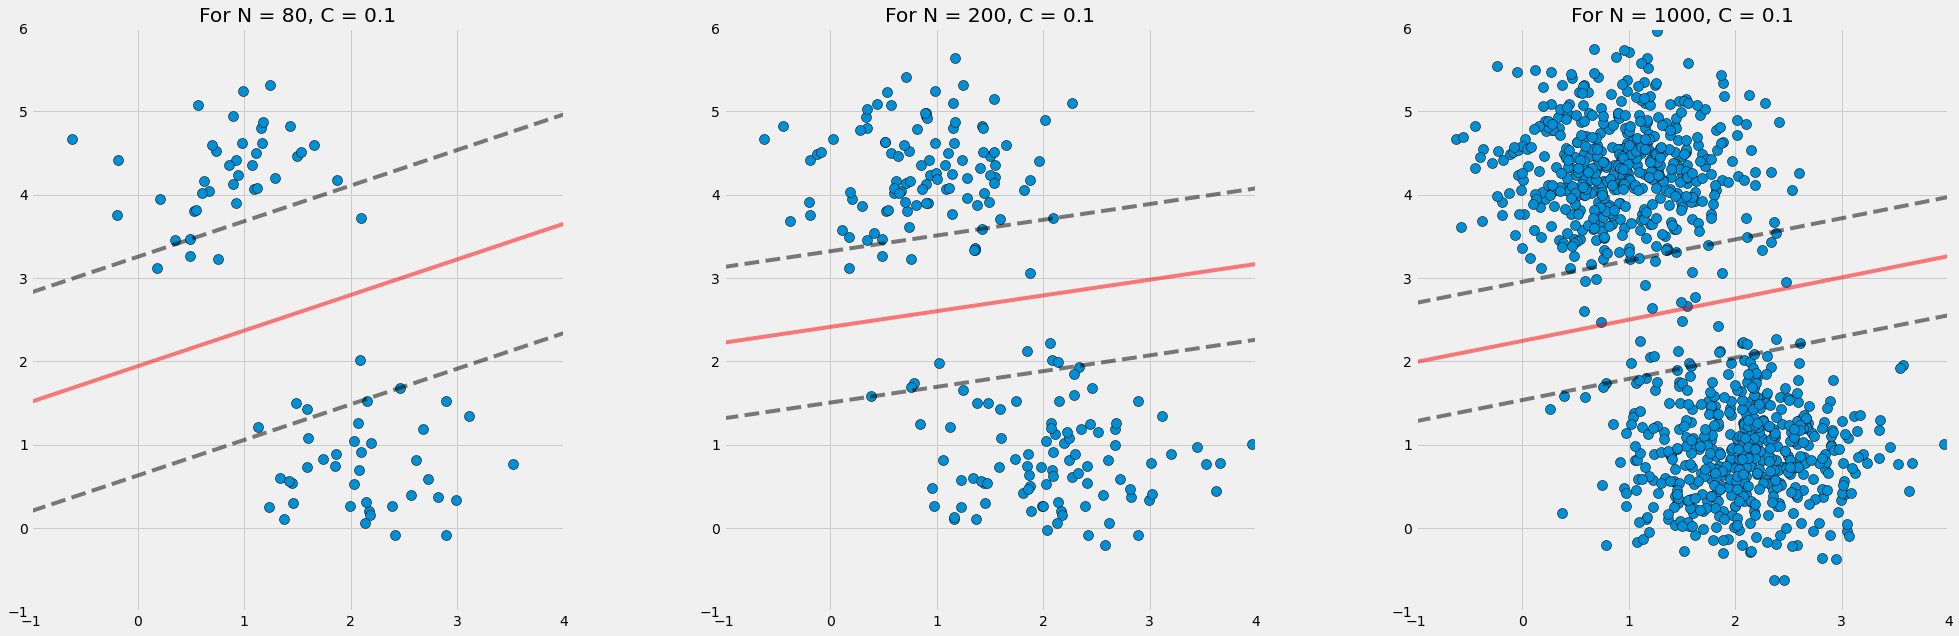

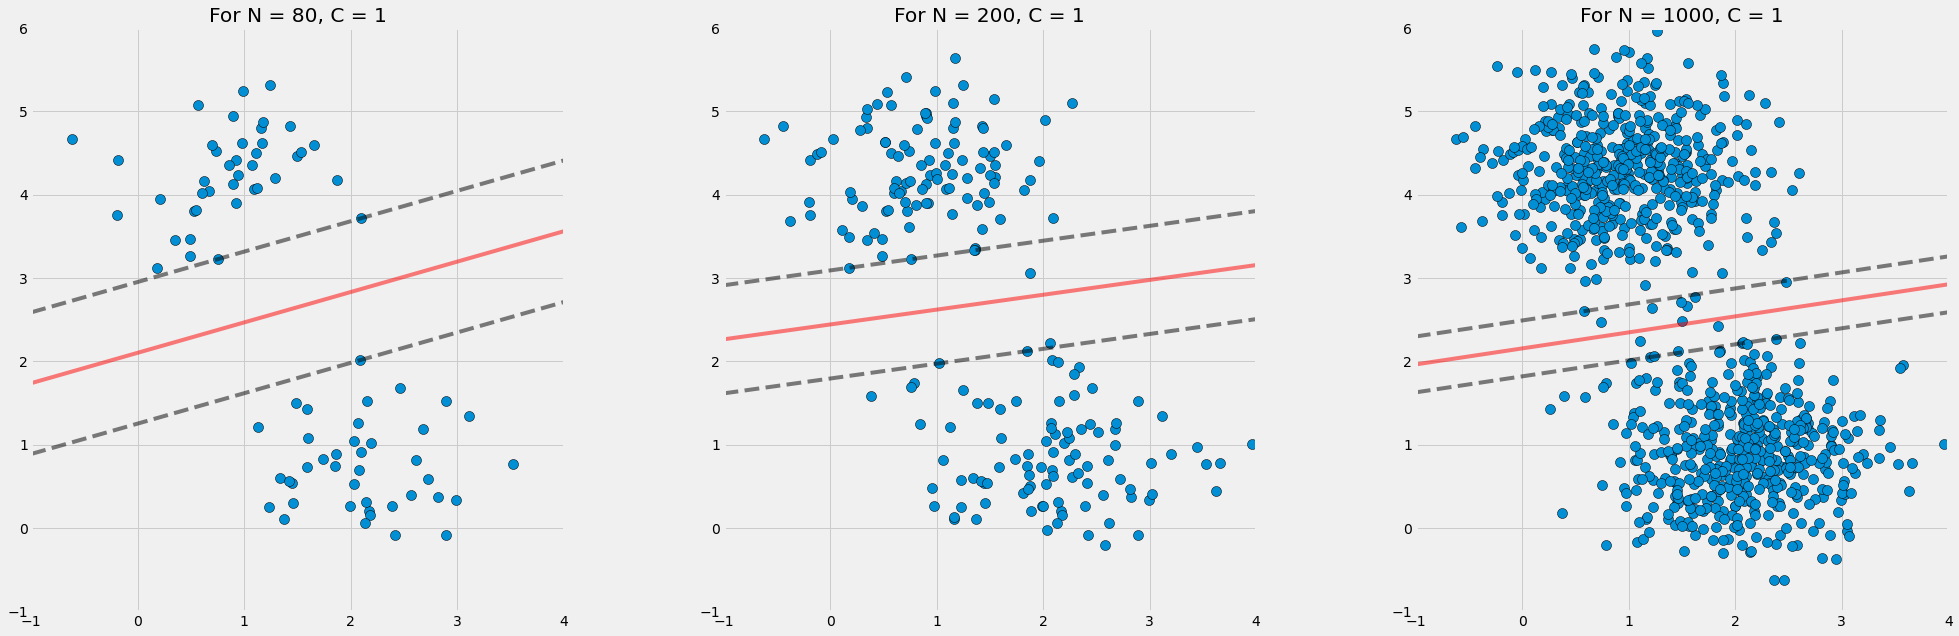

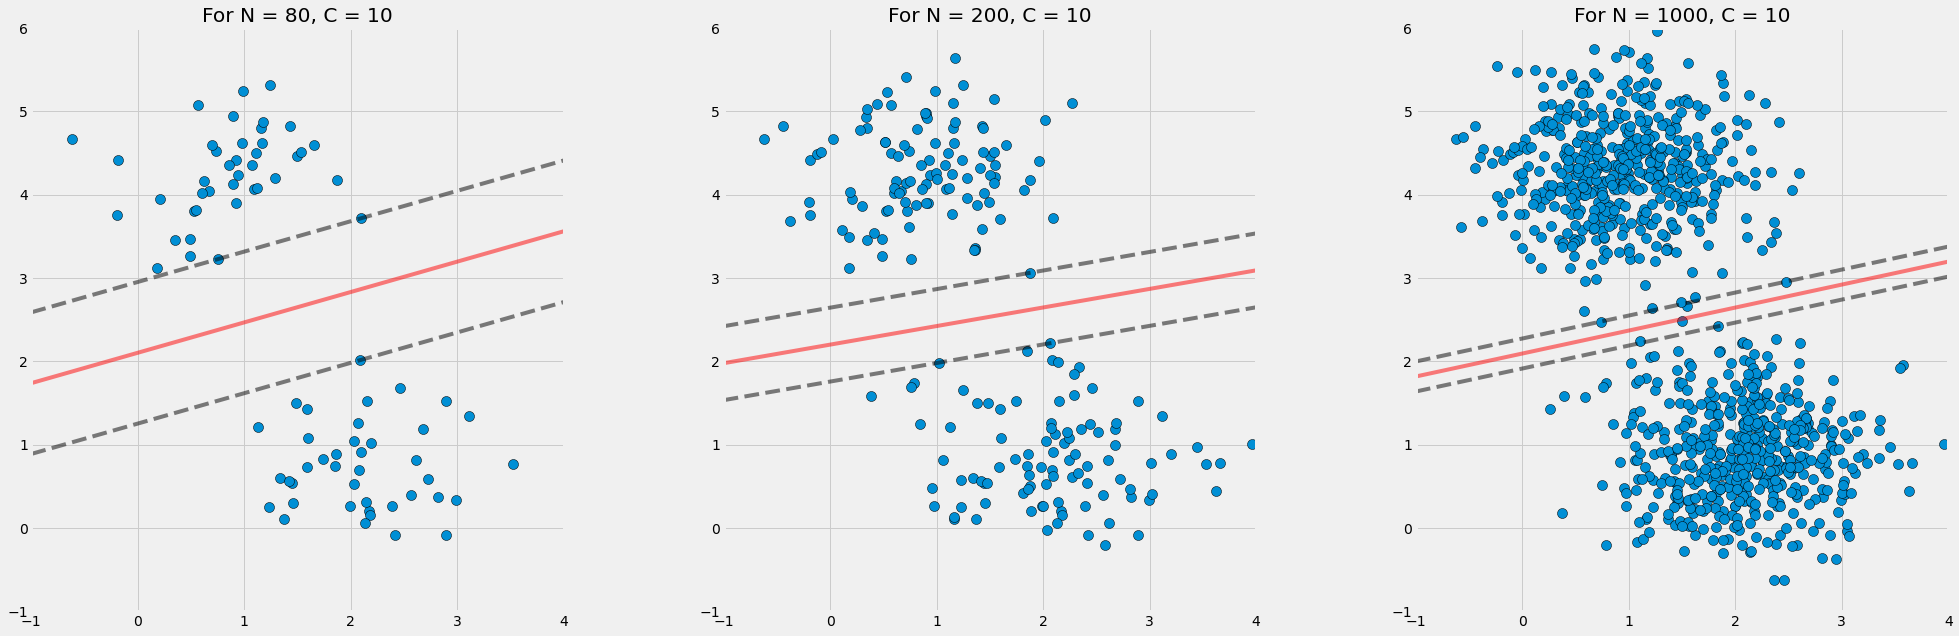

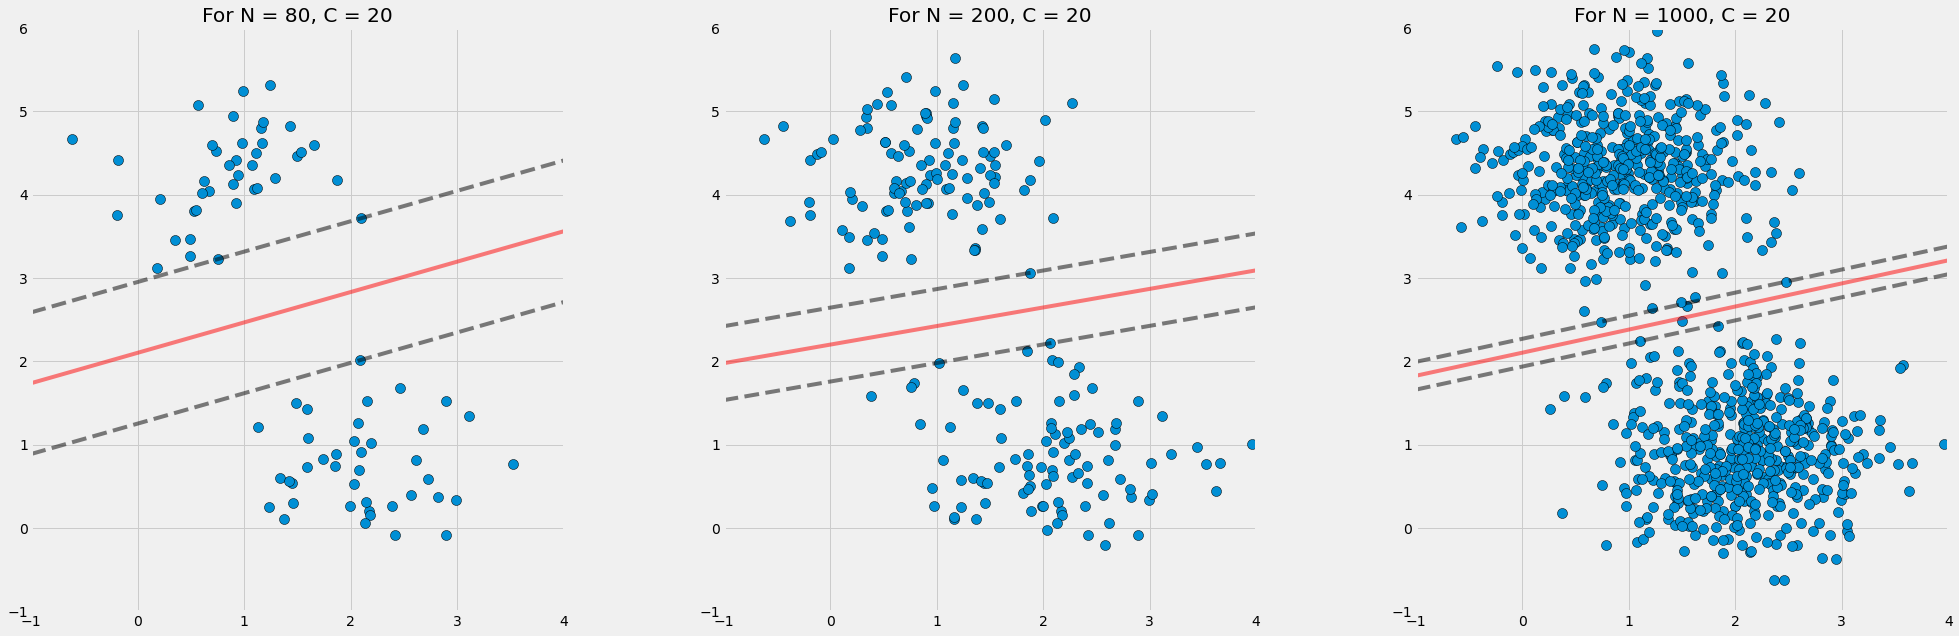

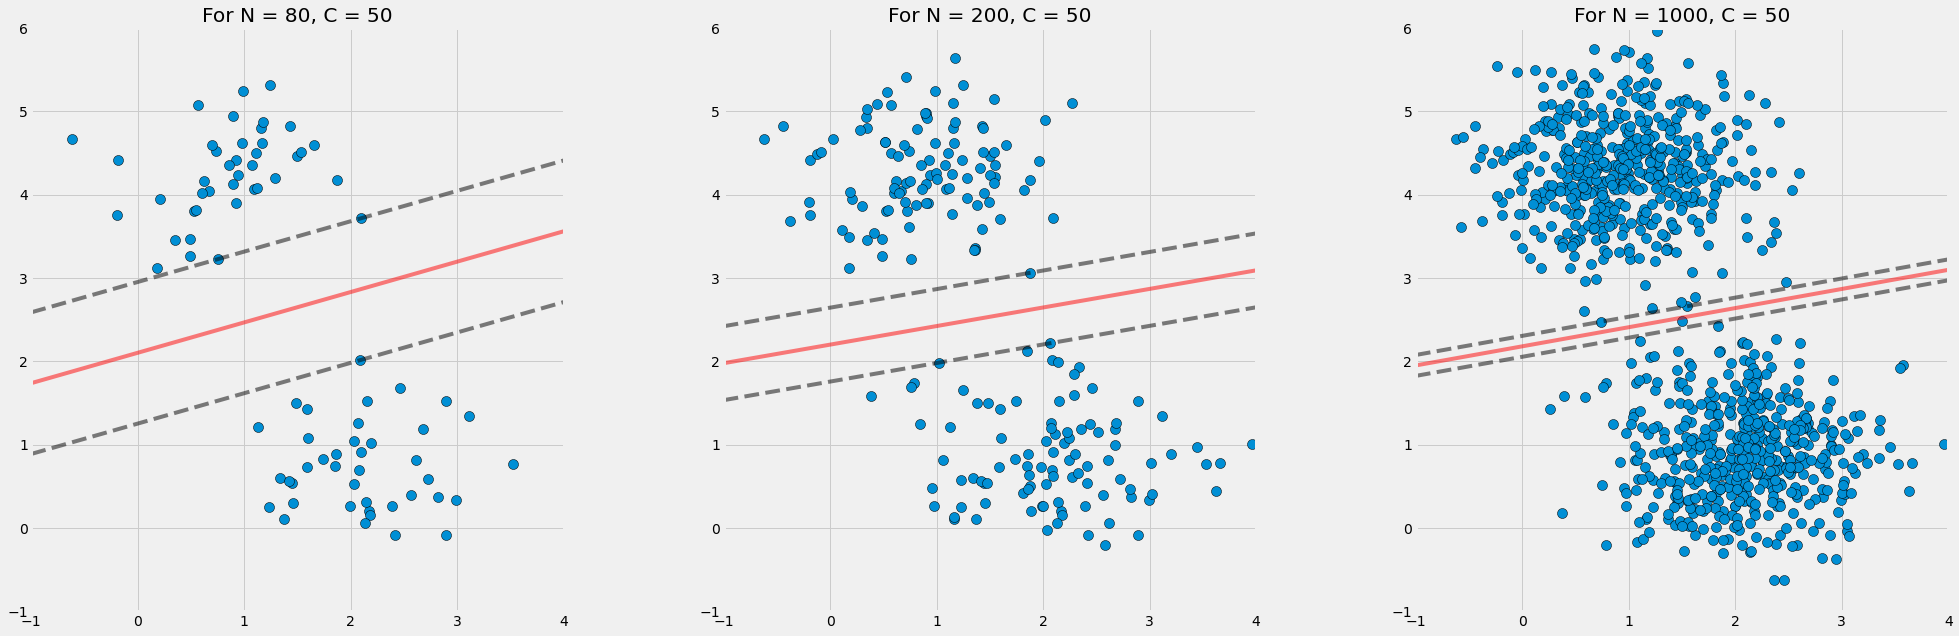

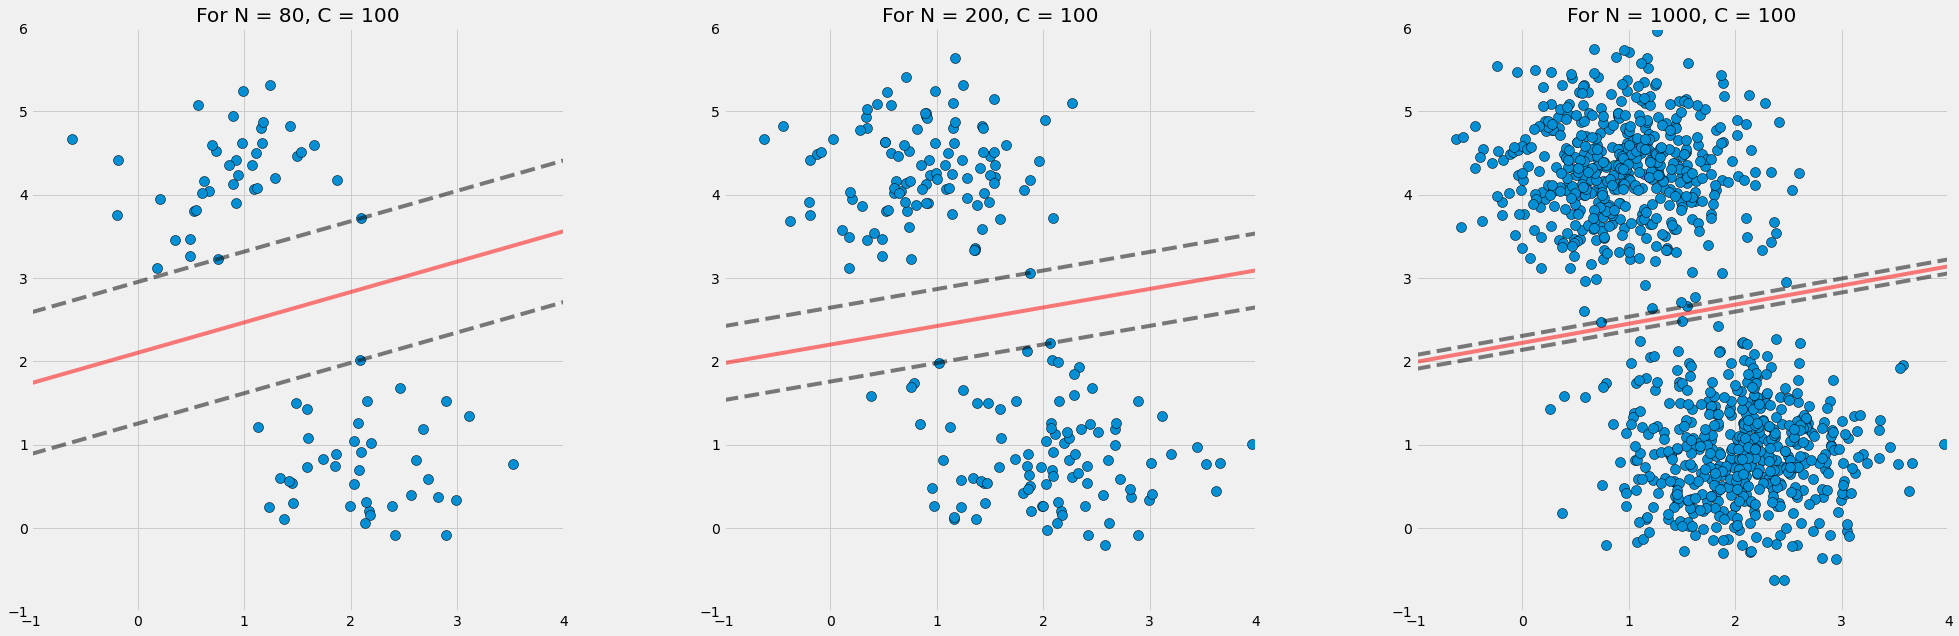

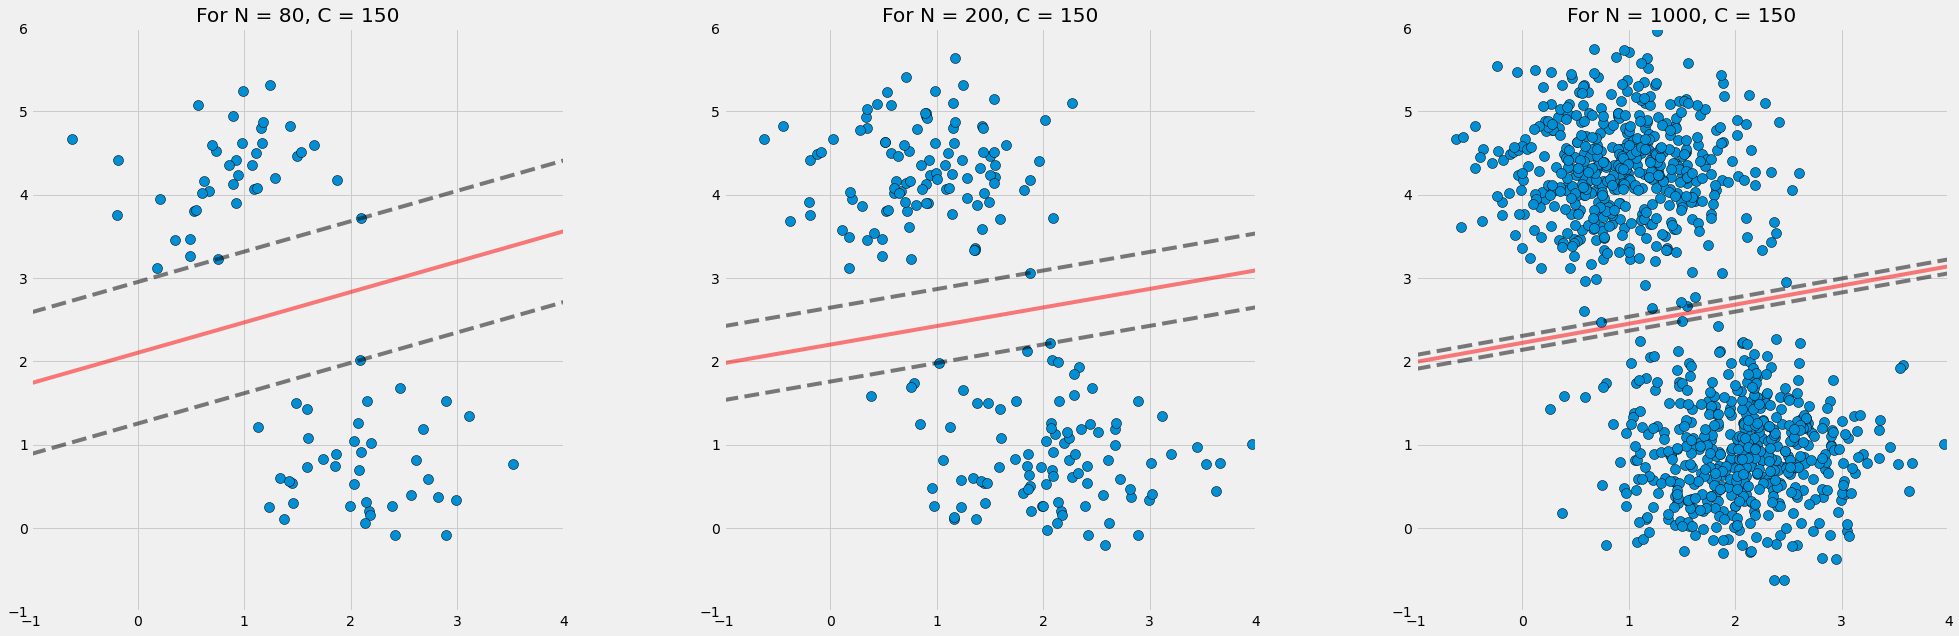

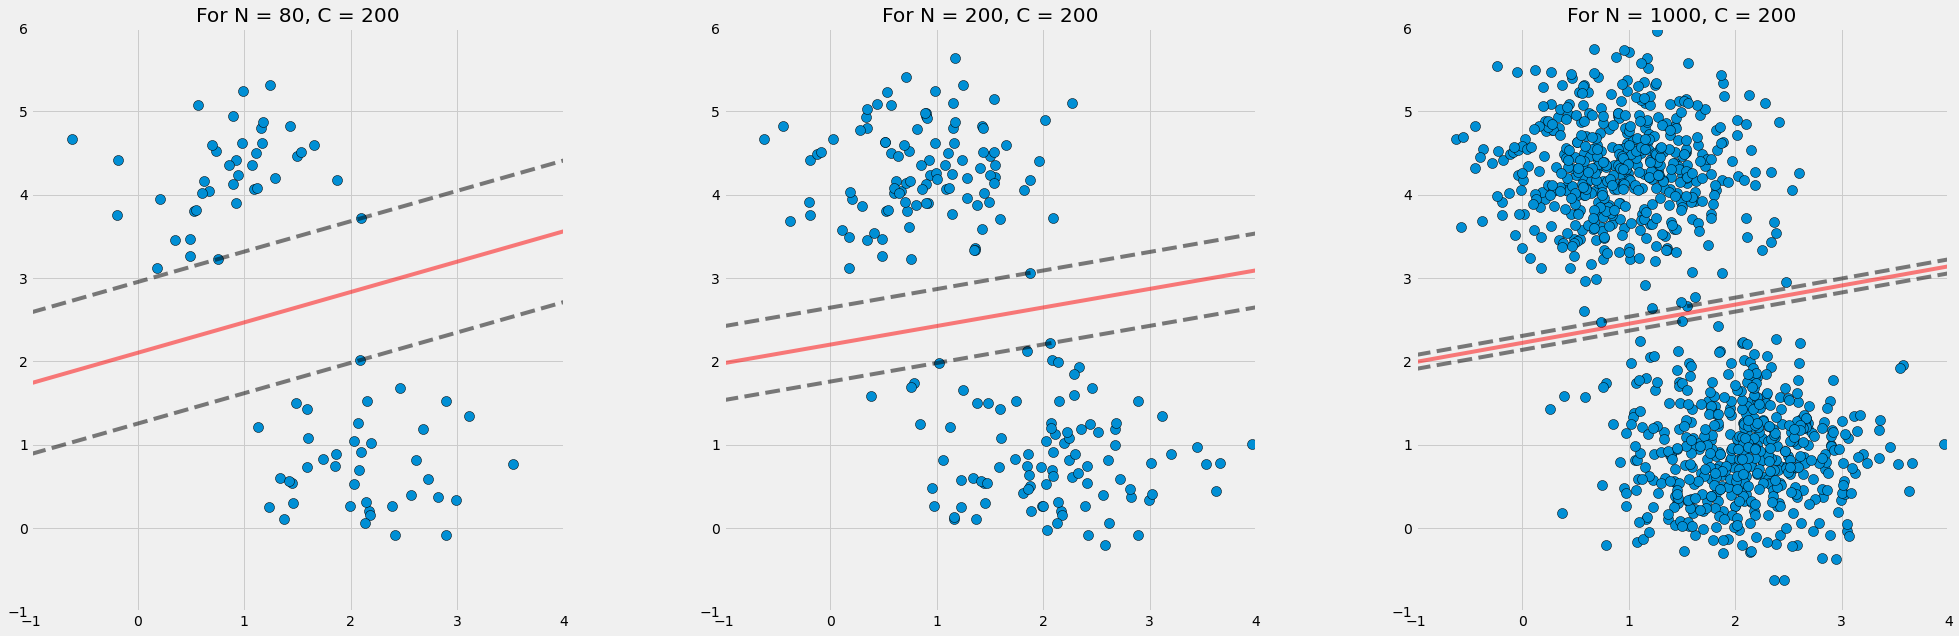

In [69]:
def plot_svm_N(N=60,ax=None,C_input=1):
  X,Y = make_blobs(n_samples=1000,centers=2,cluster_std=0.60,random_state=0)
  X = X[:N]
  Y = Y[:N]
  svm_2 = SVC(kernel='linear',C=C_input)
  svm_2.fit(X,Y)

  # Plotting
  ax = ax or plt.gca()
  ax.scatter(X[:,0],X[:,1],cmap='winter',edgecolor='black',s=100)
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svm(svm_2,ax)

# Test run for 2 values of N
C_list = [0.001,0.1,1,10,20,50,100,150,200]
for c in C_list:
  fig, ax = plt.subplots(1, 3,figsize=(30,10))
  fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.3,hspace=0.3)
  for ax_i,N_val in zip(ax,[80,200,1000]):
    plot_svm_N(N_val,ax_i,c)
    ax_i.set_title("For N = {}, C = {}".format(N_val,c))